# **Análise de Dados - Projeto Unicornios** <p>
**por: @Vinicius Moreira** - [Linkedin](https://www.linkedin.com/in/vhsmdev/) <p>


# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


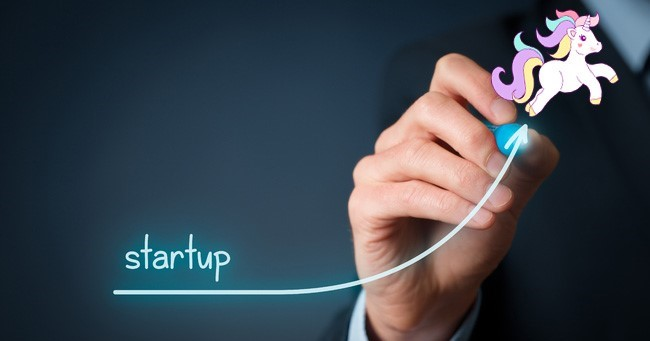

In [5]:
# Importando as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [6]:
# Ler os dados
Base_Dados = pd.read_csv("database.csv")

# Verificar a dimensão
Base_Dados.shape

(1186, 7)

In [7]:
# Adicionando Coluna ID
Base_Dados["Id"] = np.random.randint(low=1, high=6, size=len(Base_Dados))

In [8]:
# Primeiros registros
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Id
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",3
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",1
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",4


In [9]:
# Colunas
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors', 'Id'],
      dtype='object')

In [10]:
# Renomear colunas
Base_Dados.rename(columns={
    "Company": "Empresa",
    "Valuation ($B)": "Valor ($B)",
    "Date Joined": "Data de Adesão",
    "Country": "Pais",
    "City ": "Cidade",
    "Industry": "Setor",
    "Investors": "Investidores",
}, inplace=True)

In [11]:
# Verificar Tipo de Informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($B)      1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
 7   Id              1186 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 74.2+ KB


<Axes: title={'center': 'Analisando Campos Nulos'}>

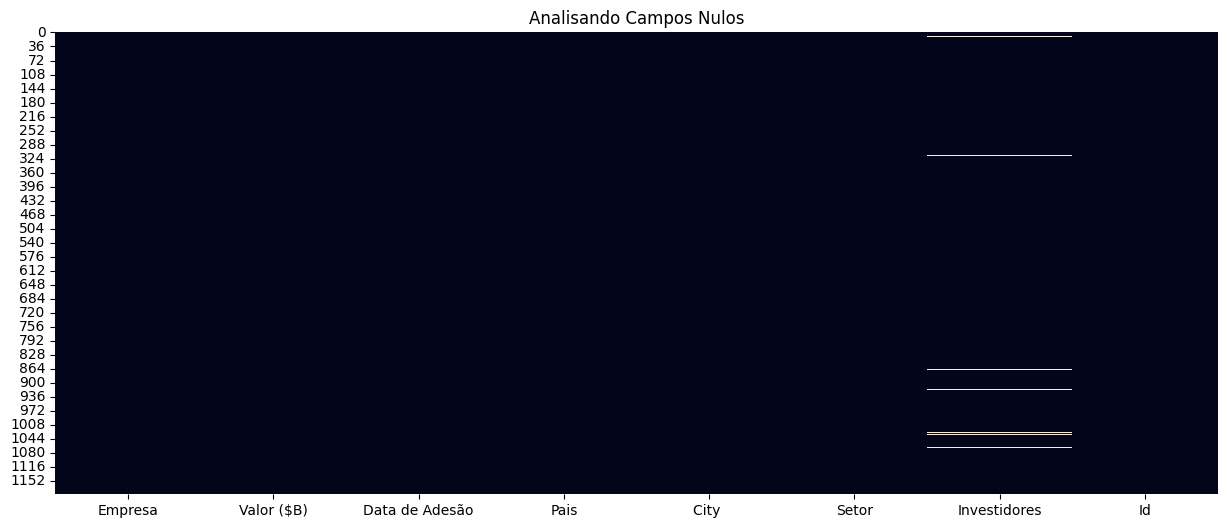

In [12]:
# Checando se há campos nulos
plt.figure(figsize=(15,6))
plt.title("Analisando Campos Nulos")
sns.heatmap(Base_Dados.isnull(), cbar=False)

In [13]:
# Campos unicos
Base_Dados.nunique()

Empresa           1183
Valor ($B)         222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
Id                   5
dtype: int64

In [14]:
# Valores unicos
Base_Dados["Setor"].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [15]:
# Valores Unicos - Rank Quantidade
Base_Dados["Setor"].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

In [16]:
# Valores Unicos - Rank Percentual
Base_Dados["Setor"].value_counts(normalize=True)

Setor
Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                        

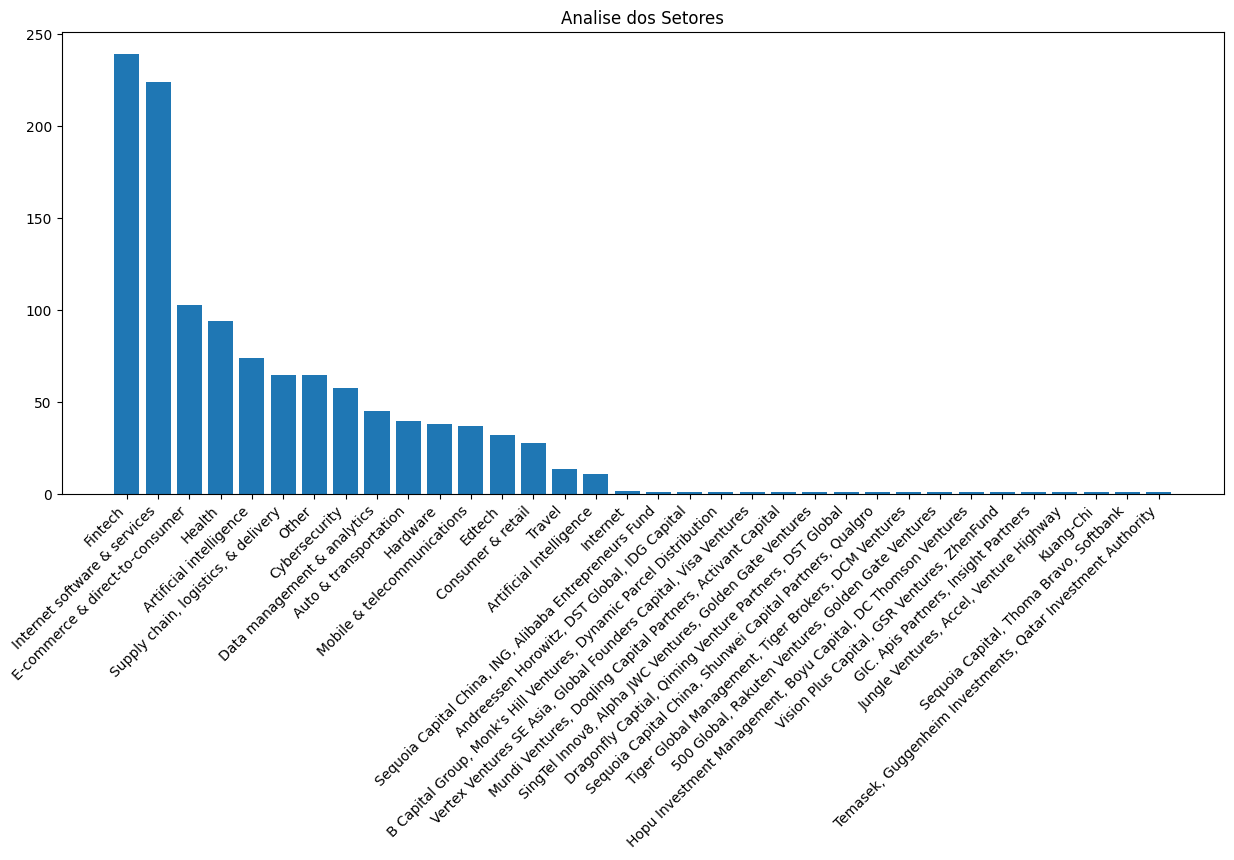

In [17]:
# Analise dos setores
plt.figure(figsize=(15,6))
plt.title("Analise dos Setores")
plt.bar(Base_Dados["Setor"].value_counts().index, Base_Dados["Setor"].value_counts())
plt.xticks(rotation=45, ha="right")
plt.show()

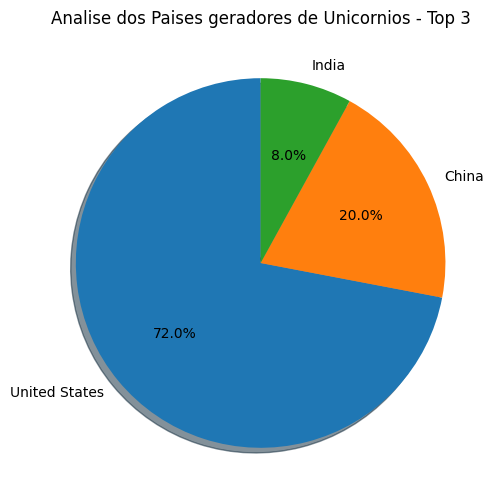

In [18]:
# Top 10 paises com mais unicornios
analise_paises = round(Base_Dados["Pais"].value_counts( normalize=True) * 100)

plt.figure(figsize=(15,6))
plt.title("Analise dos Paises geradores de Unicornios - Top 3")
plt.pie(
    analise_paises.head(3),
    labels = analise_paises.index[0:3],
    shadow=True,
    startangle=90,
    autopct="%1.1f%%"
)

plt.show()

In [19]:
# Conversão para Data
Base_Dados["Data de Adesão"] = pd.to_datetime(Base_Dados["Data de Adesão"])
Base_Dados["Data de Adesão"].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [20]:
# Extraindo Ano e Mes
Base_Dados["Mes"] = pd.DatetimeIndex(Base_Dados["Data de Adesão"]).month
Base_Dados["Ano"] = pd.DatetimeIndex(Base_Dados["Data de Adesão"]).year

Base_Dados.head()

,Empresa,Valor ($B),Data de Adesão,Pais,City,Setor,Investidores,Id,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",3,4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3,12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",1,7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2,1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",4,1,2018


In [21]:
# Tratando o campo de valor
Base_Dados["Valor ($B)"] = pd.to_numeric(Base_Dados["Valor ($B)"].apply(lambda Linha: Linha.replace("$", "")))

In [22]:
# Tabela Analitica
analise_agrupada = Base_Dados.groupby(by=["Pais", "Ano", "Mes", "Empresa", "Valor ($B)"]).count()["Id"].reset_index()
analise_agrupada

,Pais,Ano,Mes,Empresa,Valor ($B),Id
0,Argentina,2021,8,Uala,2.45,1
1,Australia,2018,1,Canva,40.00,1
2,Australia,2019,3,Airwallex,5.50,1
3,Australia,2021,5,SafetyCulture,1.60,1
4,Australia,2021,7,Culture Amp,1.50,1
...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1.00,1
1182,United States,2022,8,Incredible Health,1.65,1
1183,United States,2022,8,Orna Therapeutics,1.50,1
1184,Vietnam,2021,10,Sky Mavis,3.00,1


In [23]:
# Tabela analitica do Brasil
analise_agrupada.loc[
    analise_agrupada["Pais"] == "Brazil"
]

,Pais,Ano,Mes,Empresa,Valor ($B),Id
16,Brazil,2018,7,Movile,1.00,1
17,Brazil,2018,11,iFood,1.00,1
18,Brazil,2019,6,Loggi,2.00,1
19,Brazil,2019,9,QuintoAndar,5.10,1
20,Brazil,2019,10,EBANX,1.00,1
21,Brazil,2019,12,Wildlife Studios,3.00,1
22,Brazil,2020,1,Loft,2.90,1
23,Brazil,2020,12,C6 Bank,5.05,1
24,Brazil,2020,12,Creditas,4.80,1
25,Brazil,2021,1,MadeiraMadeira,1.00,1


In [27]:
# Tabela Analitica
analise_pais = Base_Dados.groupby(by=['Pais']).sum(numeric_only=True)['Valor ($B)'].reset_index()

analise_pais.head()

,Pais,Valor ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


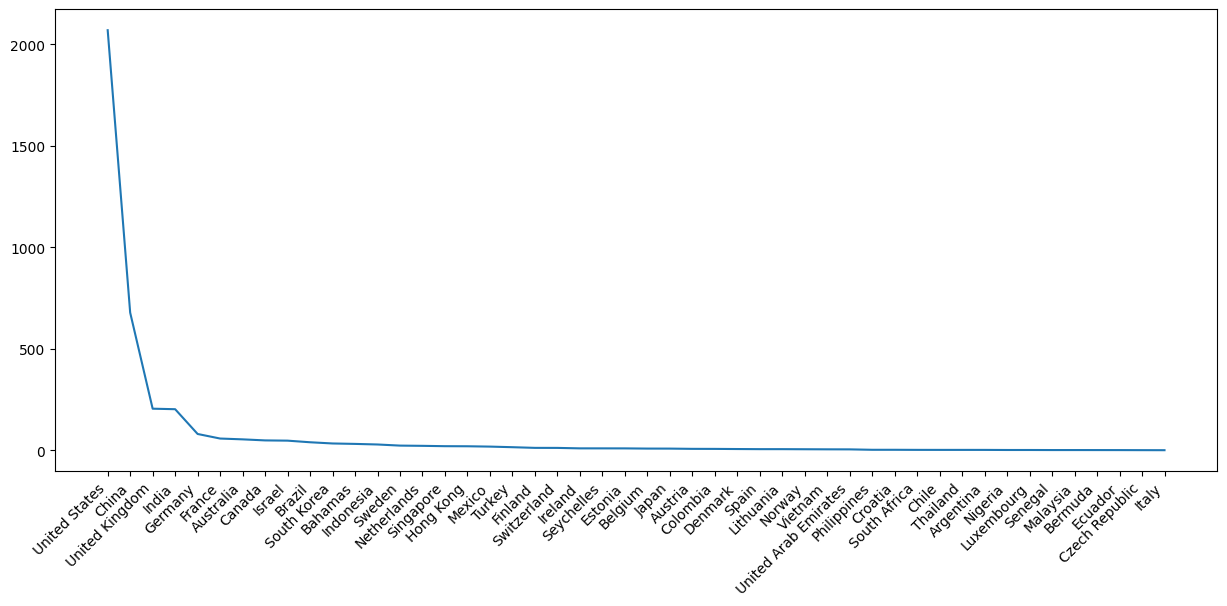

In [31]:
# Analise de valuation por pais
analise_valor = analise_pais.sort_values("Valor ($B)", ascending=False)

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha="right")
plt.plot(analise_valor["Pais"], analise_valor["Valor ($B)"])
plt.show()